ADF Test Results:
Test Statistic: -2.2570
P-value: 0.1862
Critical Values: {'1%': -3.4476305904172904, '5%': -2.869155980820355, '10%': -2.570827146203181}
The time series is NOT stationary (Fail to reject H0).


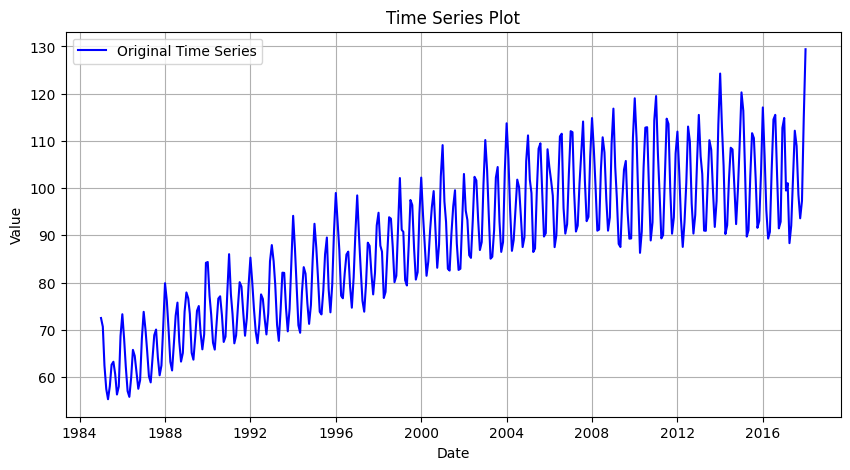

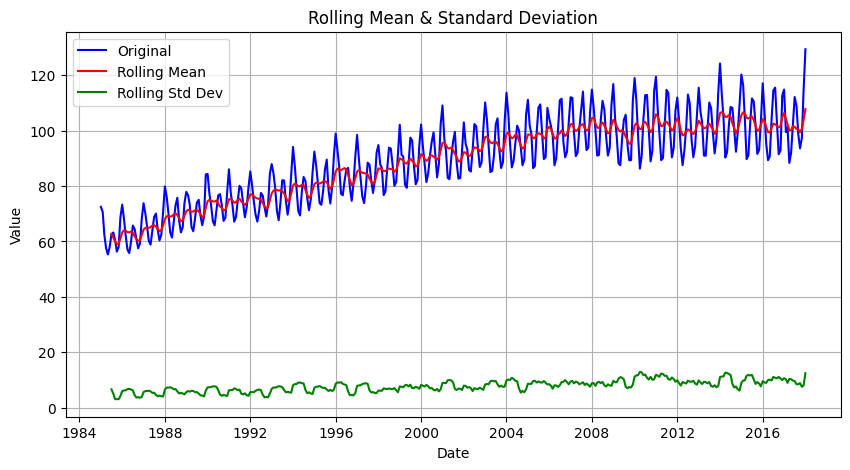

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv('/content/drive/MyDrive/cdata2.csv')

df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

def adf_test(series):
    result = adfuller(series)
    print("ADF Test Results:")
    print(f"Test Statistic: {result[0]:.4f}")
    print(f"P-value: {result[1]:.4f}")
    print(f"Critical Values: {result[4]}")

    if result[1] < 0.05:
        print("The time series is stationary (Reject H0).")
    else:
        print("The time series is NOT stationary (Fail to reject H0).")

adf_test(df['Value'])

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Value'], color='blue', label='Original Time Series')
plt.title("Time Series Plot")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

rolling_mean = df['Value'].rolling(window=7).mean()
rolling_std = df['Value'].rolling(window=7).std()

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Value'], label='Original', color='blue')
plt.plot(df.index, rolling_mean, label='Rolling Mean', color='red')
plt.plot(df.index, rolling_std, label='Rolling Std Dev', color='green')
plt.title("Rolling Mean & Standard Deviation")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()
